In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [2]:
data1 = r'C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets'

In [3]:
Images = []
import os
for dirname, _, filenames in os.walk(data1):
    for filename in filenames:
        img = os.path.join(dirname, filename)
        Images.append(img)

In [4]:
Images[10]

'C:\\Users\\KARTHIK\\Music\\ASTRONOMIAL\\datasets\\elliptical Galaxy HD\\Image_106.jpg'

In [5]:
Class_label = []
for i in Images:
  j = i.split("\\")
  
#   print(j)
  Class_label.append(j[-2])

In [6]:
Class_label[:10]

['elliptical Galaxy HD',
 'elliptical Galaxy HD',
 'elliptical Galaxy HD',
 'elliptical Galaxy HD',
 'elliptical Galaxy HD',
 'elliptical Galaxy HD',
 'elliptical Galaxy HD',
 'elliptical Galaxy HD',
 'elliptical Galaxy HD',
 'elliptical Galaxy HD']

In [7]:
import random
temp = list(zip(Images, Class_label)) 
random.shuffle(temp) 
Images, Class_label = zip(*temp)

In [8]:
data = pd.DataFrame(list(zip(Images, Class_label)), columns =['Image_path', 'Class_label'])   

In [9]:
data

,Image_path,Class_label
0,C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\el...,elliptical Galaxy HD
1,C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\sd...,sdss spiral galaxy
2,C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\sd...,sdss spiral galaxy
3,C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\sd...,sdss spiral galaxy
4,C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\sd...,sdss spiral galaxy
...,...,...
893,C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\sd...,sdss spiral galaxy
894,C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\sd...,sdss spiral galaxy
895,C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\sd...,sdss spiral galaxy
896,C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\el...,elliptical Galaxy HD


In [10]:
data.shape 

(898, 2)

In [11]:
data.Class_label.value_counts() 

sdss spiral galaxy      511
elliptical Galaxy HD    387
Name: Class_label, dtype: int64

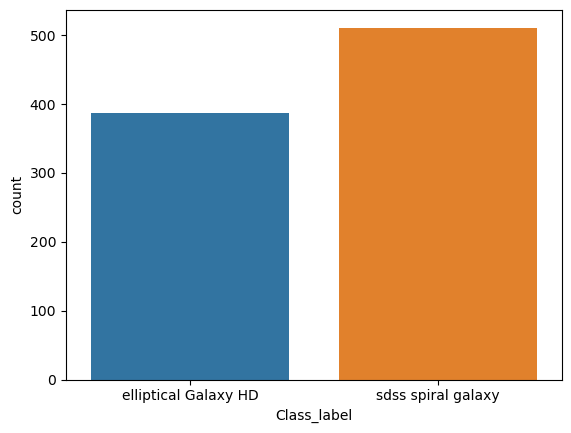

In [12]:
sns.countplot(x = data.Class_label, data = data) 
plt.show()

Text(0.5, 0, 'Class_label')

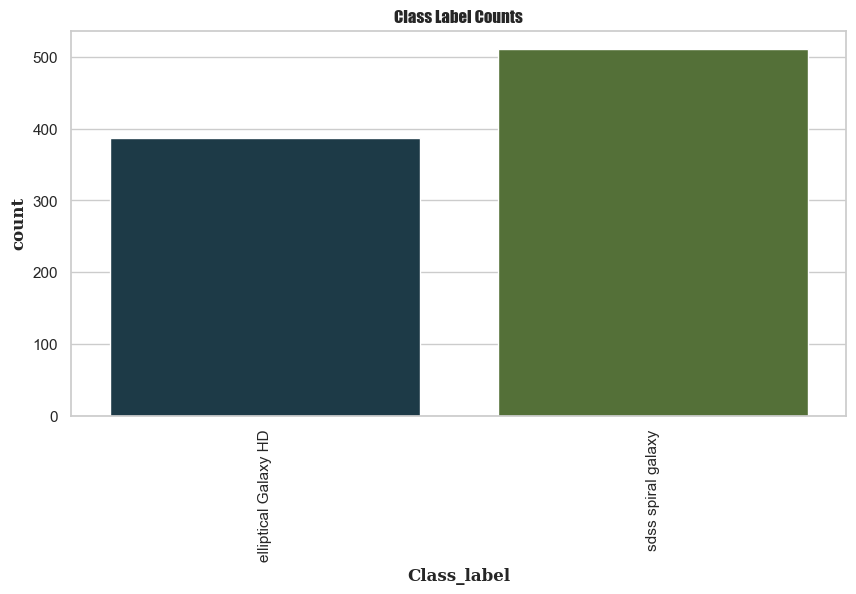

In [13]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Class_label", data=data, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"}) 

In [14]:
from sklearn.utils import resample
# Separate majority and minority classes
df_c0 = data[data['Class_label']== 'sdss spiral galaxy']
df_c1 = data[data['Class_label']== 'elliptical Galaxy HD']

 
# Downsample majority class
df_c0_upsampled = resample(df_c0, replace=True,  n_samples = 1500,random_state=123)
df_c1_upsampled = resample(df_c1, replace=True,  n_samples = 1500,random_state=123)




# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_c0_upsampled,df_c1_upsampled])
 
# Display new class counts
df_upsampled['Class_label'].value_counts()

sdss spiral galaxy      1500
elliptical Galaxy HD    1500
Name: Class_label, dtype: int64

Text(0.5, 0, 'Class_label')

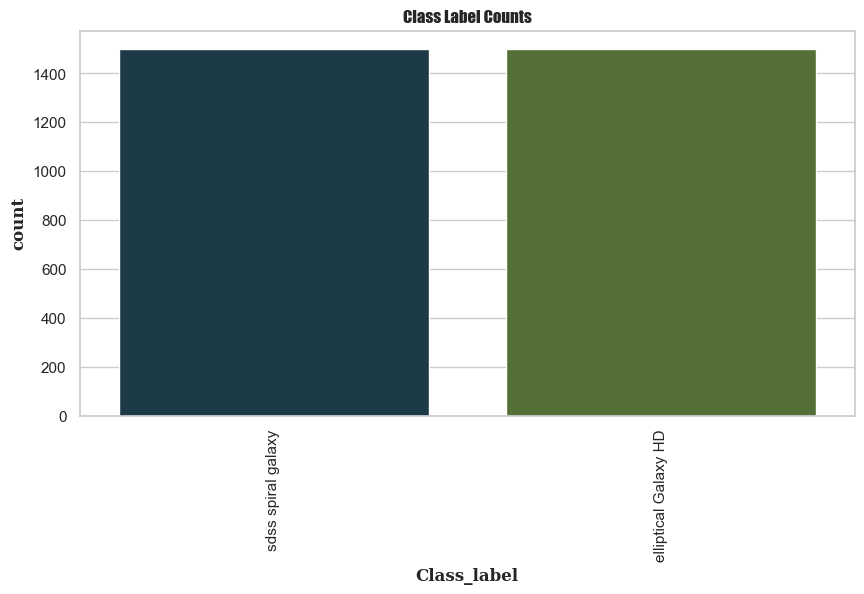

In [15]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Class_label", data=df_upsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [16]:
df = df_upsampled.sample(frac=1)
df.head()

,Image_path,Class_label
632,C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\el...,elliptical Galaxy HD
159,C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\sd...,sdss spiral galaxy
288,C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\el...,elliptical Galaxy HD
95,C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\sd...,sdss spiral galaxy
829,C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\el...,elliptical Galaxy HD


In [17]:
df['Image_path'].value_counts()

C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\elliptical Galaxy HD\Image_119.jpg    10
C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\elliptical Galaxy HD\Image_416.jpg    10
C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\elliptical Galaxy HD\Image_294.jpg     9
C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\sdss spiral galaxy\Image_169.jpg       9
C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\elliptical Galaxy HD\Image_408.jpg     9
                                                                                  ..
C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\elliptical Galaxy HD\Image_16.jpg      1
C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\sdss spiral galaxy\Image_32.jpg        1
C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\sdss spiral galaxy\Image_371.jpg       1
C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\elliptical Galaxy HD\Image_357.jpg     1
C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\sdss spiral galaxy\Image_88.jpg        1
Name: Image_path, Length: 848, dtype: int64

In [18]:
df.iloc[0,:-1]

Image_path    C:\Users\KARTHIK\Music\ASTRONOMIAL\datasets\el...
Name: 632, dtype: object

In [19]:
import os
from PIL import Image

In [20]:
def resize_images(img):
  file = Image.open(img)
  img = file.convert('RGB')
  img_bgr= img.resize((224, 224))
  img_bgr = np.array(img_bgr)
  return img_bgr

In [21]:
#save resized images into images.
images = [resize_images(img) for img in df['Image_path']]

In [22]:
images

[array([[[  2,   3,   8],
         [  0,   0,   5],
         [  2,   3,   8],
         ...,
         [  1,   2,   7],
         [  1,   2,   8],
         [  1,   1,   9]],
 
        [[  5,   6,  11],
         [  2,   3,   8],
         [  4,   5,  10],
         ...,
         [  1,   2,   7],
         [  1,   2,   8],
         [  1,   1,   9]],
 
        [[  5,   6,  11],
         [  4,   5,  10],
         [  5,   6,  11],
         ...,
         [  1,   2,   7],
         [  1,   2,   8],
         [  1,   1,   9]],
 
        ...,
 
        [[157, 180, 197],
         [183, 203, 216],
         [203, 221, 225],
         ...,
         [  4,   1,   8],
         [  6,   2,   9],
         [  6,   1,   8]],
 
        [[158, 179, 201],
         [177, 197, 214],
         [189, 206, 214],
         ...,
         [  4,   1,   8],
         [  8,   2,   8],
         [  7,   0,   7]],
 
        [[162, 182, 208],
         [175, 192, 213],
         [180, 195, 207],
         ...,
         [  3,   1,   6],
  

In [23]:
# print number of classes in our dataset 
num_classes = len(np.unique(data['Class_label']))

In [24]:
num_classes

2

In [58]:
# save the class into class_names
class_names = list(data['Class_label'])

In [59]:
# Print the shape of the image
images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'elliptical Galaxy HD')

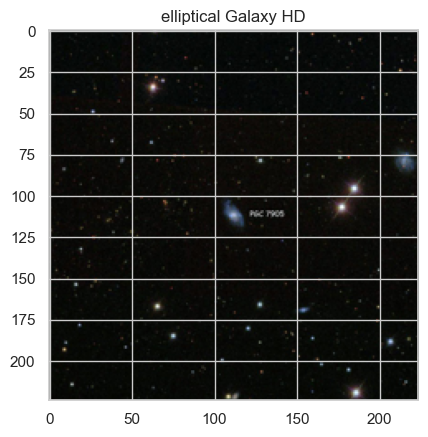

In [60]:
#See the image with class label
plt.imshow(images[5])
plt.title(class_names[5])

Text(0.5, 1.0, 'elliptical Galaxy HD')

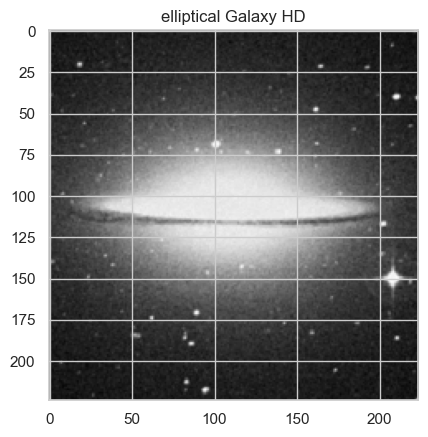

In [28]:
#See the image with class label
plt.imshow(images[9])
plt.title(class_names[9])

Text(0.5, 1.0, 'sdss spiral galaxy')

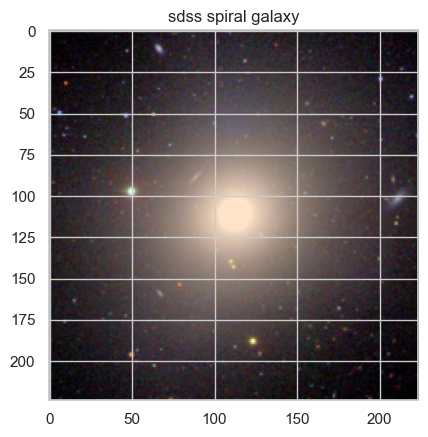

In [29]:
#See the image with class label
plt.imshow(images[60])
plt.title(class_names[60])

In [30]:
# Convert the images into array
images =  np.array(images)

In [31]:
# Shape of the images
images.shape

(3000, 224, 224, 3)

In [32]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
Y = enc.fit_transform(df['Class_label'])
from keras.utils.np_utils  import to_categorical
y = to_categorical(Y)

In [33]:
enc.classes_

array(['elliptical Galaxy HD', 'sdss spiral galaxy'], dtype='<U20')

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [35]:
X_train.shape

(2100, 224, 224, 3)

In [36]:
X_test.shape

(900, 224, 224, 3)

## vgg19

In [37]:
# import the vgg19 model
from keras.applications.vgg19 import VGG19

In [38]:
vgg=VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [39]:
vgg.trainable=False

In [40]:
# Set the vgg16 model
model_1=Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(2, activation='softmax'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 23,236,034
Trainable params: 3,211,650
Non-trainable params: 20,024,384
_________________________________________________________________


In [41]:
#Compile the model
model_1.compile(optimizer = 'rmsprop', loss = "binary_crossentropy", metrics = ["accuracy"])

In [42]:
#Fit the data or train the model
History_1 = model_1.fit(X_train, y_train, epochs = 10, validation_data = (X_test,y_test),batch_size = 128)

Epoch 1/10
17/17 [==============================] - 600s 35s/step - loss: 8.2786 - accuracy: 0.7505 - val_loss: 1.6192 - val_accuracy: 0.8211
Epoch 2/10
17/17 [==============================] - 828s 50s/step - loss: 0.4494 - accuracy: 0.9348 - val_loss: 0.1819 - val_accuracy: 0.9611
Epoch 3/10
17/17 [==============================] - 705s 42s/step - loss: 0.1916 - accuracy: 0.9519 - val_loss: 0.1532 - val_accuracy: 0.9444
Epoch 4/10
17/17 [==============================] - 464s 28s/step - loss: 0.1583 - accuracy: 0.9471 - val_loss: 2.3103 - val_accuracy: 0.6789
Epoch 5/10
17/17 [==============================] - 453s 27s/step - loss: 0.9421 - accuracy: 0.8767 - val_loss: 0.1045 - val_accuracy: 0.9744
Epoch 6/10
17/17 [==============================] - 442s 26s/step - loss: 0.0861 - accuracy: 0.9671 - val_loss: 0.0980 - val_accuracy: 0.9744
Epoch 7/10
17/17 [==============================] - 497s 30s/step - loss: 0.0776 - accuracy: 0.9705 - val_loss: 0.0991 - val_accuracy: 0.9622
Epoch 

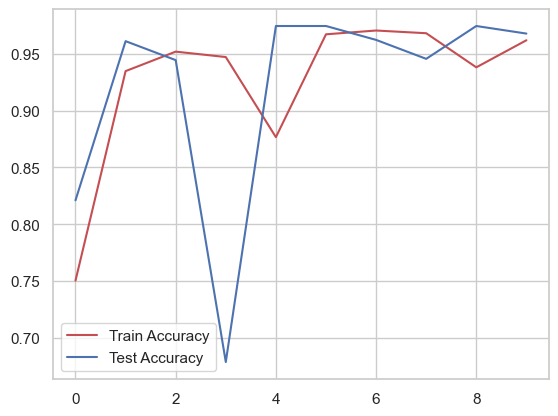

In [43]:
# plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

29/29 [==============================] - 148s 5s/step


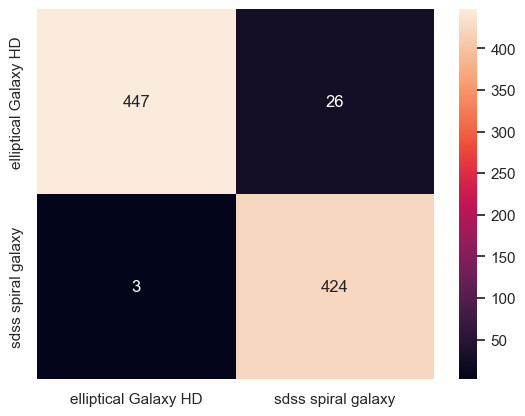

In [44]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_1.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [45]:
# print the test accuracy
score_2 = model_1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])

Test accuracy: 0.9677777886390686


1/1 [==============================] - 0s 232ms/step
Predicted class: elliptical Galaxy HD
Actual class: elliptical Galaxy HD


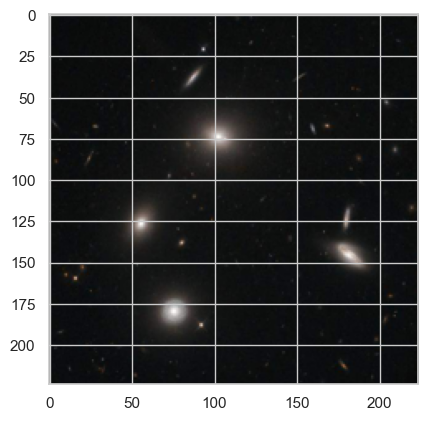

In [46]:
i = 3
pred = np.argmax(model_1.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test[i])

## INCEPTION V3

In [47]:
from keras.applications.inception_v3 import InceptionV3

In [48]:
inv = InceptionV3(include_top=False, weights='imagenet', input_tensor=None,input_shape=(224,224,3),classifier_activation='softmax',)


In [49]:
# Set the vgg16 model
model_2=Sequential()
model_2.add(inv)
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(2, activation='softmax'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               6553728   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 28,356,770
Trainable params: 28,322,338
Non-trainable params: 34,432
_________________________________________________________________


In [50]:
#Compile the model
model_2.compile(optimizer = 'adamax', loss = "binary_crossentropy", metrics = ["accuracy"])

In [51]:
#Fit the data or train the model
History_2 = model_2.fit(X_train, y_train, epochs = 5, validation_data = (X_test,y_test),batch_size = 128)

Epoch 1/5
17/17 [==============================] - 688s 39s/step - loss: 1.4494 - accuracy: 0.7267 - val_loss: 1.0125 - val_accuracy: 0.6100
Epoch 2/5
17/17 [==============================] - 8737s 543s/step - loss: 0.1797 - accuracy: 0.9390 - val_loss: 1.1407 - val_accuracy: 0.6067
Epoch 3/5
17/17 [==============================] - 952s 56s/step - loss: 0.0877 - accuracy: 0.9690 - val_loss: 1.1026 - val_accuracy: 0.6811
Epoch 4/5
17/17 [==============================] - 919s 53s/step - loss: 0.0706 - accuracy: 0.9695 - val_loss: 0.7329 - val_accuracy: 0.7344
Epoch 5/5
17/17 [==============================] - 958s 56s/step - loss: 0.0632 - accuracy: 0.9743 - val_loss: 0.3378 - val_accuracy: 0.8456


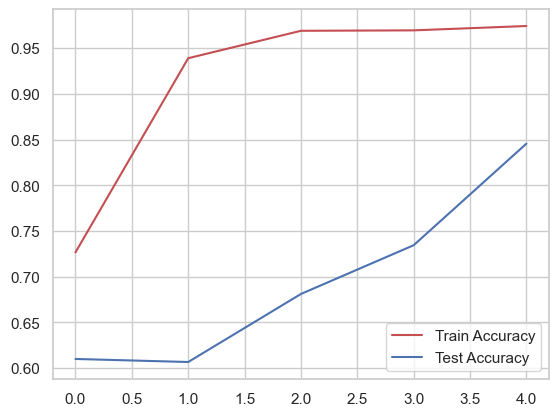

In [52]:
# plot the accuracy plot
plt.plot(History_2.history['accuracy'], 'r')
plt.plot(History_2.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

29/29 [==============================] - 56s 2s/step


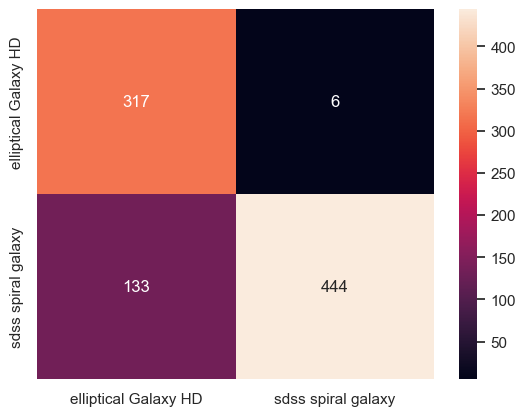

In [53]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_2.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [54]:
# print the test accuracy
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])

Test accuracy: 0.8455555438995361


1/1 [==============================] - 0s 203ms/step
Predicted class: sdss spiral galaxy
Actual class: sdss spiral galaxy


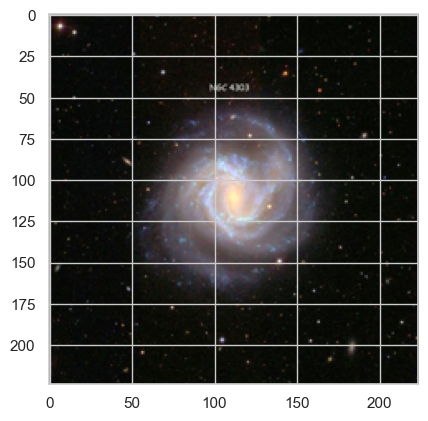

In [55]:
i = 27
pred = np.argmax(model_2.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test[i])